In [1]:
# export
from fastai2.basics import *
from fastai2.text.all import *
from fastai2.callback.all import *

from text_to_img.loss import *

In [2]:
from text_to_img.data_coco import *
from text_to_img.model import *

In [3]:
# default_exp learner

# Learner
>

## Generator learner

In [8]:
# export
def get_generator_learner(dls, generator):
    return Learner(dls, generator, loss_func=FeatureLoss('cuda'), opt_func=Adam).to_fp16()

In [9]:
# exporti
def displayable_caption(caption):
    new_cap = []
    for i, w in enumerate(caption.split()):
        i+=1
        if i>11: break
        new_cap.append(w)
        if i%6==0: new_cap.append('\n') 
    return ' '.join(new_cap)
@typedispatch
def show_results(x:TensorText, y:TensorImage, samples, outs, ctxs=None, max_n=10, **kwargs):
    n = min(len(samples), max_n)
    ncols = 4
    nrows = math.ceil((2*n)/ncols)
    figsize = (ncols*4, nrows*4)
    if ctxs is None: 
        _, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
        ctxs = ax.flatten()
    for i in range(n):
        caption, targ_img = samples[i]
        pred_img = outs[i][0]
        targ_img.show(ctxs[i*2])
        pred_img.show(ctxs[i*2+1])
        ctxs[i*2].text(0, -1.5, displayable_caption(caption))

In [10]:
vocab = get_tiny_lm_dsets().vocab
dsets = get_tiny_gen_dsets(vocab)
dls = get_gen_dls(dsets, bs=16, size=64)

encoder = Encoder(len(vocab), out_size=100)
decoder = Decoder(out_size=64, inp_size=100, num_layers=3)
generator = MGenerator(encoder, decoder)

learn = get_generator_learner(dls, generator)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


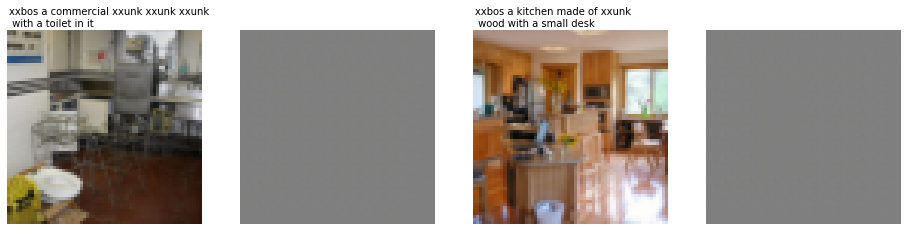

In [11]:
learn.show_results(max_n=2)

## Critic Learner

In [6]:
# export
def get_critic_learner(dls, critic):
    return Learner(dls, critic, loss_func=BCEWithLogitsLossFlat(), metrics=[accuracy], opt_func=Adam).to_fp16()

## Export -

In [7]:
# hide
from nbdev.export import notebook2script
notebook2script()

Converted 01_eda[script].ipynb.
Converted 01_gen_coco_tiny_data[script].ipynb.
Converted 02_data_coco.ipynb.
Converted 03_model.ipynb.
Converted 04_loss.ipynb.
Converted 05_leaner.ipynb.
Converted 90a_fulltest_train_lm.ipynb.
Converted 90b_fulltest_train_generator.ipynb.
Converted 95a_train_lm[script].ipynb.
Converted 95b_train_generator[script].ipynb.
Converted 95c_train_gan.ipynb.
Converted index.ipynb.
